In [8]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import python_utils as util

In [9]:
#df = pd.read_csv('./data/test-6.csv')

df = pd.read_csv(r'C:/Users/rawat/PycharmProjects/Assignment-ML4QS/data/test1.csv')

In [10]:
df.columns

Index(['acc_t', 'acc_x', 'acc_y', 'acc_z', 'acc_abs', 'gyro_x', 'gyro_y',
       'gyro_z', 'pressure', 'audio', 'gyro_t', 'pressure_t', 'audio_rate'],
      dtype='object')

In [11]:
df.head(1000)

,acc_t,acc_x,acc_y,acc_z,acc_abs,gyro_x,gyro_y,gyro_z,pressure,audio,gyro_t,pressure_t,audio_rate
0,0.019893,-0.227125,-0.017701,0.181464,0.291253,0.022192,-0.041702,0.019522,1011.646042,-9.485334e-08,0.019893,0.441057,48000.0
1,0.029872,0.010528,-0.031112,0.149362,0.152931,0.047316,-0.012172,0.006868,1011.642609,-2.238286e-07,0.029872,1.441148,48000.0
2,0.039852,0.089714,-0.079781,0.144126,0.187579,0.057324,0.004655,-0.008774,1011.640015,-1.530261e-07,0.039852,2.441241,48000.0
3,0.049832,0.103365,-0.156745,0.038534,0.191672,0.057539,0.014960,-0.024813,1011.636353,1.594218e-07,0.049832,3.441338,48000.0
4,0.059812,0.104742,-0.197830,-0.132232,0.259986,0.052753,0.010564,-0.040666,1011.630325,4.892928e-07,0.059812,3.799435,48000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.949703,-0.008162,-0.023203,-0.006211,0.025369,-0.002839,-0.002951,0.002827,NaN,-9.018743e-04,9.949703,NaN,48000.0
996,9.959682,0.005055,0.009323,0.009205,0.014043,0.005633,-0.000443,0.004279,NaN,-3.843194e-04,9.959682,NaN,48000.0
997,9.969662,0.027919,0.016207,0.007765,0.033203,0.011307,0.000128,0.006284,NaN,1.713993e-04,9.969662,NaN,48000.0
998,9.979642,0.037069,0.043496,0.007376,0.057623,0.007431,0.001512,0.007578,NaN,5.250097e-04,9.979642,NaN,48000.0


In [12]:
# check quality and compare columns
for column in df.columns:
    na_count = df[column].isna().sum()
    column_length = len(df[column])
    print(f"Column '{column}': {na_count} NaNs, Length: {column_length}")

Column 'acc_t': 9504148 NaNs, Length: 9523200
Column 'acc_x': 9504148 NaNs, Length: 9523200
Column 'acc_y': 9504148 NaNs, Length: 9523200
Column 'acc_z': 9504148 NaNs, Length: 9523200
Column 'acc_abs': 9504148 NaNs, Length: 9523200
Column 'gyro_x': 9504148 NaNs, Length: 9523200
Column 'gyro_y': 9504148 NaNs, Length: 9523200
Column 'gyro_z': 9504148 NaNs, Length: 9523200
Column 'pressure': 9523048 NaNs, Length: 9523200
Column 'audio': 0 NaNs, Length: 9523200
Column 'gyro_t': 9504148 NaNs, Length: 9523200
Column 'pressure_t': 9523048 NaNs, Length: 9523200
Column 'audio_rate': 9521192 NaNs, Length: 9523200


In [13]:
na_count_acc = df[column].isna().sum()

In [14]:
# Basic information about the dataset
print("Number of records:", len(df))
print("Number of columns:", len(df.columns))

Number of records: 9523200
Number of columns: 13


In [15]:
# Basic statistics about the dataset
print("\n Descriptive statistics for numerical attributes:")
print(df.describe(include='all'))


 Descriptive statistics for numerical attributes:
              acc_t         acc_x         acc_y         acc_z       acc_abs  \
count  19052.000000  19052.000000  19052.000000  19052.000000  19052.000000   
mean     100.728515     -0.022690     -0.104170     -0.156848      2.213435   
std       58.314226      3.298782      0.931993      2.060274      3.336423   
min        0.019893    -18.383866     -8.448223    -22.806707      0.002390   
25%       50.051822     -0.863449     -0.296105     -0.337323      0.191863   
50%      100.735412     -0.025796     -0.023690      0.003778      0.879926   
75%      151.382208      0.138326      0.166607      0.290340      2.779014   
max      201.409843     48.987926      8.089664     16.325515     49.302835   

             gyro_x        gyro_y        gyro_z     pressure         audio  \
count  19052.000000  19052.000000  19052.000000   152.000000  9.523200e+06   
mean      -0.015895      0.029248     -0.009543  1011.654198  3.585259e-07   
std

## Cleaning

In [16]:
# downsample audio data to 100 Hz like the other sensors
downsample_factor = 48000 // 100
df_audio_downsampled = df['audio'][::downsample_factor].reset_index(drop=True)

# length of ddownsampled column, because original is filled with na
audio_length = len(df_audio_downsampled)

# trim  accelerometer and gyroscope: match the audio length
df_trimmed = df.iloc[:audio_length].copy()

# finsish df with audio in it
df_trimmed['audio'] = df_audio_downsampled

# check
print("Length of downsampled audio:", len(df_audio_downsampled))
print("Length of trimmed dataframe:", len(df_trimmed))


Length of downsampled audio: 19840
Length of trimmed dataframe: 19840


In [17]:
# check quality and compare columns
for column in df.columns:
    na_count = df_trimmed[column].isna().sum()
    column_length = len(df_trimmed[column])
    print(f"Column '{column}': {na_count} NaNs, Length: {column_length}")

Column 'acc_t': 788 NaNs, Length: 19840
Column 'acc_x': 788 NaNs, Length: 19840
Column 'acc_y': 788 NaNs, Length: 19840
Column 'acc_z': 788 NaNs, Length: 19840
Column 'acc_abs': 788 NaNs, Length: 19840
Column 'gyro_x': 788 NaNs, Length: 19840
Column 'gyro_y': 788 NaNs, Length: 19840
Column 'gyro_z': 788 NaNs, Length: 19840
Column 'pressure': 19688 NaNs, Length: 19840
Column 'audio': 0 NaNs, Length: 19840
Column 'gyro_t': 788 NaNs, Length: 19840
Column 'pressure_t': 19688 NaNs, Length: 19840
Column 'audio_rate': 17832 NaNs, Length: 19840


In [18]:
# forward fill pressure data. This says: fill it with the last know pressure
df_trimmed['pressure'] = df_trimmed['pressure'].fillna(method='ffill')

C:\Users\rawat\AppData\Local\Temp\ipykernel_4700\1028537338.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_trimmed['pressure'] = df_trimmed['pressure'].fillna(method='ffill')


In [19]:
#performing interpolation on the missing values
df_trimmed['acc_t'] = df_trimmed['acc_t'].interpolate()
df_trimmed['acc_x'] = df_trimmed['acc_x'].interpolate()
df_trimmed['acc_y'] = df_trimmed['acc_y'].interpolate()
df_trimmed['acc_z'] = df_trimmed['acc_z'].interpolate()
df_trimmed['acc_abs'] = df_trimmed['acc_abs'].interpolate()
df_trimmed['gyro_t'] = df_trimmed['gyro_t'].interpolate()
df_trimmed['gyro_x'] = df_trimmed['gyro_x'].interpolate()
df_trimmed['gyro_y'] = df_trimmed['gyro_y'].interpolate()
df_trimmed['gyro_z'] = df_trimmed['gyro_z'].interpolate()

In [20]:
# check quality and compare columns
for column in df.columns:
    na_count = df_trimmed[column].isna().sum()
    column_length = len(df_trimmed[column])
    print(f"Column '{column}': {na_count} NaNs, Length: {column_length}")

Column 'acc_t': 0 NaNs, Length: 19840
Column 'acc_x': 0 NaNs, Length: 19840
Column 'acc_y': 0 NaNs, Length: 19840
Column 'acc_z': 0 NaNs, Length: 19840
Column 'acc_abs': 0 NaNs, Length: 19840
Column 'gyro_x': 0 NaNs, Length: 19840
Column 'gyro_y': 0 NaNs, Length: 19840
Column 'gyro_z': 0 NaNs, Length: 19840
Column 'pressure': 0 NaNs, Length: 19840
Column 'audio': 0 NaNs, Length: 19840
Column 'gyro_t': 0 NaNs, Length: 19840
Column 'pressure_t': 19688 NaNs, Length: 19840
Column 'audio_rate': 17832 NaNs, Length: 19840


In [21]:
data = pd.DataFrame({
    "acc_x": df_trimmed['acc_x'],
    "acc_y": df_trimmed['acc_y'],
    "acc_z": df_trimmed['acc_z'],
    "acc_abs": df_trimmed['acc_abs']
})

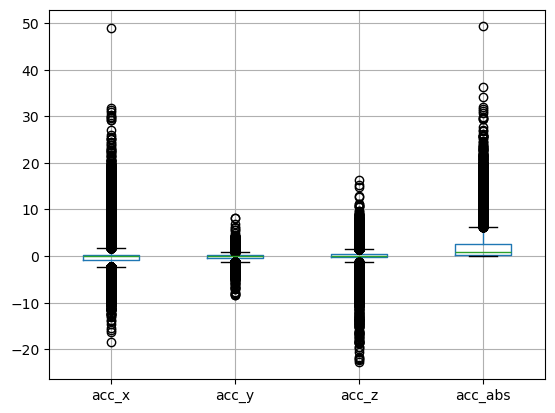

In [22]:
data.boxplot()
plt.show()

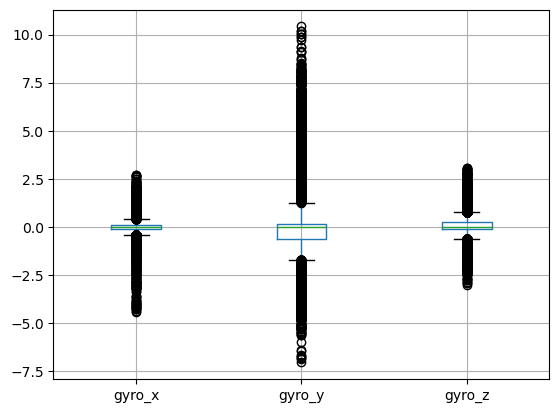

In [23]:
data = pd.DataFrame({
    "gyro_x": df_trimmed['gyro_x'],
    "gyro_y": df_trimmed['gyro_y'],
    "gyro_z": df_trimmed['gyro_z']
})
data.boxplot()
plt.show()

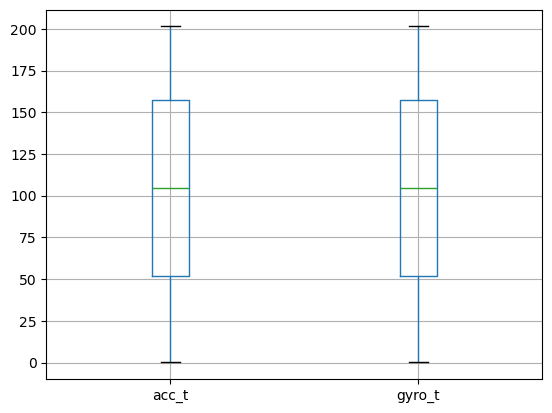

In [24]:
data = pd.DataFrame({
    "acc_t": df_trimmed['acc_t'],
    "gyro_t": df_trimmed['gyro_t']
})
data.boxplot()
plt.show()

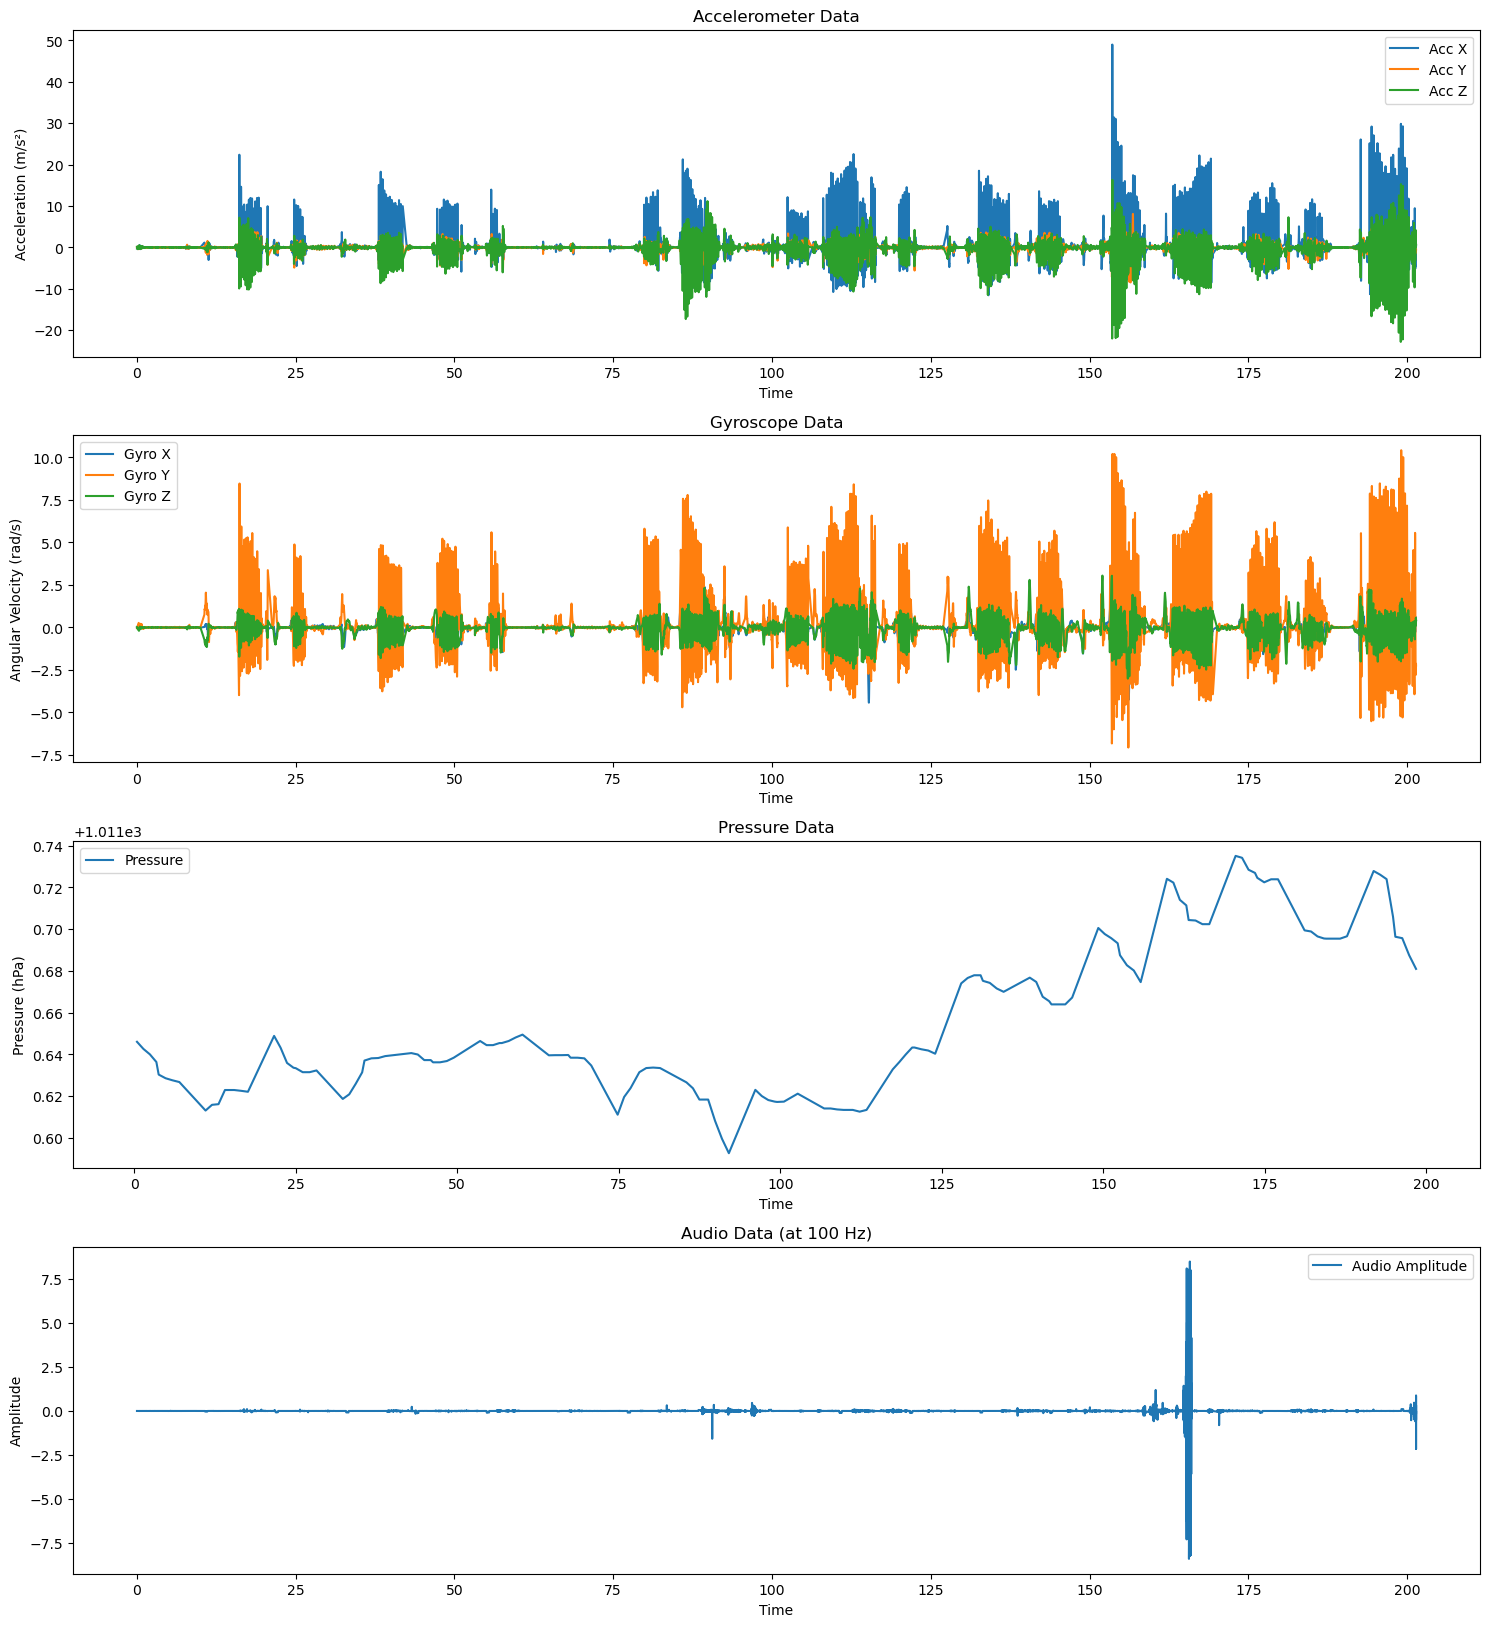

In [25]:
#plots
plt.figure(figsize=(15, 20))

# accelerometer 
plt.subplot(5, 1, 1)
plt.plot(df_trimmed['acc_t'], df_trimmed['acc_x'], label='Acc X')
plt.plot(df_trimmed['acc_t'], df_trimmed['acc_y'], label='Acc Y')
plt.plot(df_trimmed['acc_t'], df_trimmed['acc_z'], label='Acc Z')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.title('Accelerometer Data')

# gyroscope 
plt.subplot(5, 1, 2)
plt.plot(df_trimmed['gyro_t'], df_trimmed['gyro_x'], label='Gyro X')
plt.plot(df_trimmed['gyro_t'], df_trimmed['gyro_y'], label='Gyro Y')
plt.plot(df_trimmed['gyro_t'], df_trimmed['gyro_z'], label='Gyro Z')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Gyroscope Data')

# pressure 
plt.subplot(5, 1, 3)
plt.plot(df_trimmed['pressure_t'], df_trimmed['pressure'], label='Pressure')
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')
plt.legend()
plt.title('Pressure Data')

# Plotting downsampled audio data
plt.subplot(5, 1, 4)
plt.plot(df_trimmed['acc_t'], df_trimmed['audio'], label='Audio Amplitude')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Audio Data (at 100 Hz)')

plt.tight_layout()
plt.show()

In [26]:
def chauvenet(self, data_table, col, C):
    # Computer the mean and standard deviation.
    mean = data_table[col].mean()
    std = data_table[col].std()
    N = len(data_table.index)
    criterion = 1.0/(C*N)
    
    # Consider the deviation for the data points.
    deviation = abs(data_table[col] - mean)/std
    
    # Express the upper and lower bounds.
    low = -deviation/math.sqrt(C)
    high = deviation/math.sqrt(C)
    prob = []
    mask = []
    
    # Pass all rows in the dataset.
    for i in range(0, len(data_table.index)):
        # Determine the probability of observing the point
        prob.append(
            1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i])))
        # And mark as an outlier when the probability is below our criterion.
        mask.append(prob[i] < criterion)
    data_table[col + '_outlier'] = mask
    return data_table

In [27]:
chauvenet(self=0,data_table=df_trimmed, col='acc_t', C=2)

,acc_t,acc_x,acc_y,acc_z,acc_abs,gyro_x,gyro_y,gyro_z,pressure,audio,gyro_t,pressure_t,audio_rate,acc_t_outlier
0,0.019893,-0.227125,-0.017701,0.181464,0.291253,0.022192,-0.041702,0.019522,1011.646042,-9.485334e-08,0.019893,0.441057,48000.0,False
1,0.029872,0.010528,-0.031112,0.149362,0.152931,0.047316,-0.012172,0.006868,1011.642609,-1.982452e-04,0.029872,1.441148,48000.0,False
2,0.039852,0.089714,-0.079781,0.144126,0.187579,0.057324,0.004655,-0.008774,1011.640015,-9.219810e-05,0.039852,2.441241,48000.0,False
3,0.049832,0.103365,-0.156745,0.038534,0.191672,0.057539,0.014960,-0.024813,1011.636353,-2.307027e-04,0.049832,3.441338,48000.0,False
4,0.059812,0.104742,-0.197830,-0.132232,0.259986,0.052753,0.010564,-0.040666,1011.630325,-7.600996e-04,0.059812,3.799435,48000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19835,201.409843,0.516518,-0.472880,0.589712,0.915515,0.377738,-2.235173,0.448830,1011.680984,2.640407e-02,201.409843,NaN,NaN,False
19836,201.409843,0.516518,-0.472880,0.589712,0.915515,0.377738,-2.235173,0.448830,1011.680984,-7.191627e-02,201.409843,NaN,NaN,False
19837,201.409843,0.516518,-0.472880,0.589712,0.915515,0.377738,-2.235173,0.448830,1011.680984,3.764607e-03,201.409843,NaN,NaN,False
19838,201.409843,0.516518,-0.472880,0.589712,0.915515,0.377738,-2.235173,0.448830,1011.680984,-4.633528e-02,201.409843,NaN,NaN,False


In [28]:
chauvenet(self=0,data_table=df_trimmed, col='acc_x', C=2)

,acc_t,acc_x,acc_y,acc_z,acc_abs,gyro_x,gyro_y,gyro_z,pressure,audio,gyro_t,pressure_t,audio_rate,acc_t_outlier,acc_x_outlier
0,0.019893,-0.227125,-0.017701,0.181464,0.291253,0.022192,-0.041702,0.019522,1011.646042,-9.485334e-08,0.019893,0.441057,48000.0,False,False
1,0.029872,0.010528,-0.031112,0.149362,0.152931,0.047316,-0.012172,0.006868,1011.642609,-1.982452e-04,0.029872,1.441148,48000.0,False,False
2,0.039852,0.089714,-0.079781,0.144126,0.187579,0.057324,0.004655,-0.008774,1011.640015,-9.219810e-05,0.039852,2.441241,48000.0,False,False
3,0.049832,0.103365,-0.156745,0.038534,0.191672,0.057539,0.014960,-0.024813,1011.636353,-2.307027e-04,0.049832,3.441338,48000.0,False,False
4,0.059812,0.104742,-0.197830,-0.132232,0.259986,0.052753,0.010564,-0.040666,1011.630325,-7.600996e-04,0.059812,3.799435,48000.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19835,201.409843,0.516518,-0.472880,0.589712,0.915515,0.377738,-2.235173,0.448830,1011.680984,2.640407e-02,201.409843,NaN,NaN,False,False
19836,201.409843,0.516518,-0.472880,0.589712,0.915515,0.377738,-2.235173,0.448830,1011.680984,-7.191627e-02,201.409843,NaN,NaN,False,False
19837,201.409843,0.516518,-0.472880,0.589712,0.915515,0.377738,-2.235173,0.448830,1011.680984,3.764607e-03,201.409843,NaN,NaN,False,False
19838,201.409843,0.516518,-0.472880,0.589712,0.915515,0.377738,-2.235173,0.448830,1011.680984,-4.633528e-02,201.409843,NaN,NaN,False,False


In [29]:
"""# Finds outliers in the specified column of datatable and adds a binary column with
# the same name extended with '_outlier' that expresses the result per data point.
mean = df_trimmed["acc_x"].mean()
std = df_trimmed["acc_x"].std()
N = len(df_trimmed.index)
criterion = 1.0/(2*N)

deviation = abs(df_trimmed["acc_x"] - mean)/std
# Express the upper and lower bounds.
low = -deviation/math.sqrt(2)
high = deviation/math.sqrt(2)
prob = []
mask = []

        # Pass all rows in the dataset.
for i in range(0, len(df_trimmed.index)):
# Determine the probability of observing the point
    prob.append(
        1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i])))
    # And mark as an outlier when the probability is below our criterion.
    mask.append(prob[i] < criterion)
df_trimmed['acc_x' + '_outlier'] = mask""""

SyntaxError: unterminated string literal (detected at line 22) (1030289540.py, line 22)

In [2]:
# Class for Principal Component Analysis. We can only apply this when we do not have missing values (i.e. NaN).
# For this we have to impute these first, be aware of this.
class PrincipalComponentAnalysis:

    pca = []

    def __init__(self):
        self.pca = []

    # Perform the PCA on the selected columns and return the explained variance.
    def determine_pc_explained_variance(self, data_table, cols):
        # Normalize the data first.
        #dt_norm = util.normalize_dataset(data_table, cols)

        # perform the PCA.
        self.pca = PCA(n_components = len(cols))
        self.pca.fit(dt_norm[cols])
        # And return the explained variances.
        return self.pca.explained_variance_ratio_

    # Apply a PCA given the number of components we have selected.
    # We add new pca columns.
    def apply_pca(self, data_table, cols, number_comp):
        # Normalize the data first.
        #dt_norm = util.normalize_dataset(data_table, cols)

        # perform the PCA.
        self.pca = PCA(n_components = number_comp)
        self.pca.fit(dt_norm[cols])

        # Transform our old values.
        new_values = self.pca.transform(dt_norm[cols])

        #And add the new ones:
        for comp in range(0, number_comp):
            data_table['pca_' +str(comp+1)] = new_values[:,comp]
        return data_table


In [3]:
temp = PrincipalComponentAnalysis()